In [2]:
## Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import os

In [3]:
##Changing the Working directory
os.chdir("D:\\GL\SMDM")

##  Problem 1 : Wholesale Customers Analysis

### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [4]:
# Reading the data as a data frame
WSCustomerData = pd.read_csv("Wholesale+Customers+Data.csv")

In [5]:
#checking the head of the data frame
WSCustomerData.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


### Exploratory Data Analysis

In [6]:
#checking the data types /information
WSCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


#### - The data has 440 instances with 9 attributes. 7 integer type and 2 object type(Strings in the column) 

In [7]:
## Checking the number of rows and columns
WSCustomerData.shape

(440, 9)

#### The data set contains 440 observatiosn of data and 9 variables.

In [8]:
#checking for missing values
WSCustomerData.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [9]:
## Summary (also called as 5 Point summary)

WSCustomerData.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


### Q 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [13]:
## Summary (also called as 5 Point summary)

WSCustomerData.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


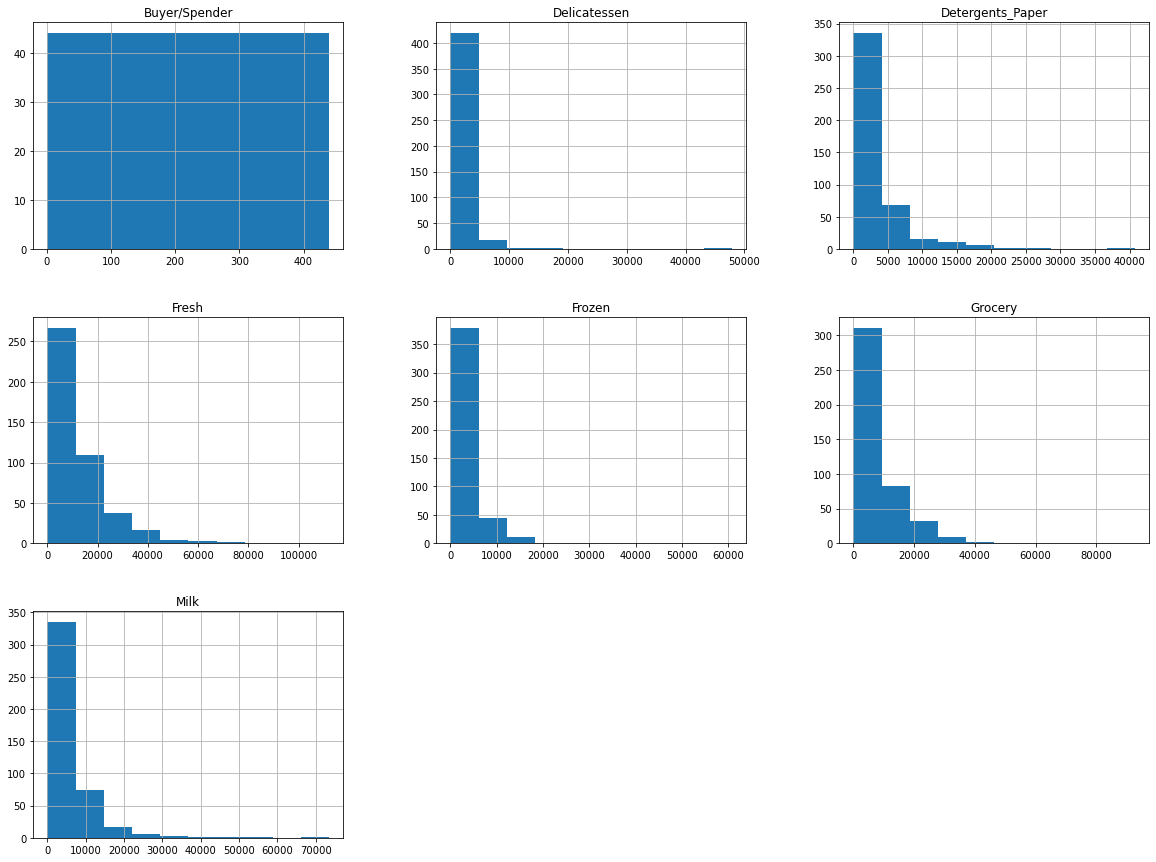

In [16]:
#Plotting the histograms for all the variables

WSCustomerData.hist(figsize=(20,15));

In [17]:
#Checking the skewness

Skewness = WSCustomerData.skew()
print(Skewness)

Buyer/Spender        0.000000
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64


In [10]:
#Checking the Spending across both channels
WSCustomerData.Channel.value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [11]:
#Checking the Spending across all regions
WSCustomerData.Region.value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

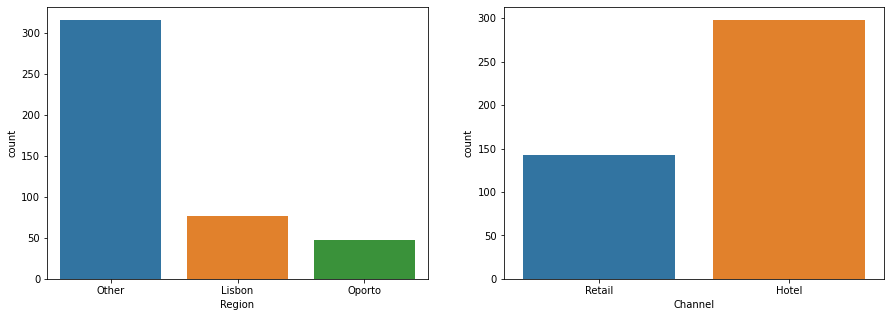

In [12]:
#Plotting Count Plots to see how different regions and channels have been distributed.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x =WSCustomerData['Region'])

plt.subplot(1,2,2)
sns.countplot(x =WSCustomerData['Channel'])

plt.show()

- Hotel Channel and Other Region seems to spend more.
- Retail Channel and Oporto Region seems to spend less.

### Q 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

In [13]:
# Checking the variations in different items on the basis of mean,median,min, max and standard deviation through 5 point summary
WSCustomerData.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- The mean and median values of all the items is very different

In [14]:
# Measure the skeweness 
Skewness = WSCustomerData.skew()
print(Skewness)

Buyer/Spender        0.000000
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64


- Fresh milk is the least skewed.
- the spending across all items is right skewed.
- Spending across Delicatessen is highly skewed to the right.

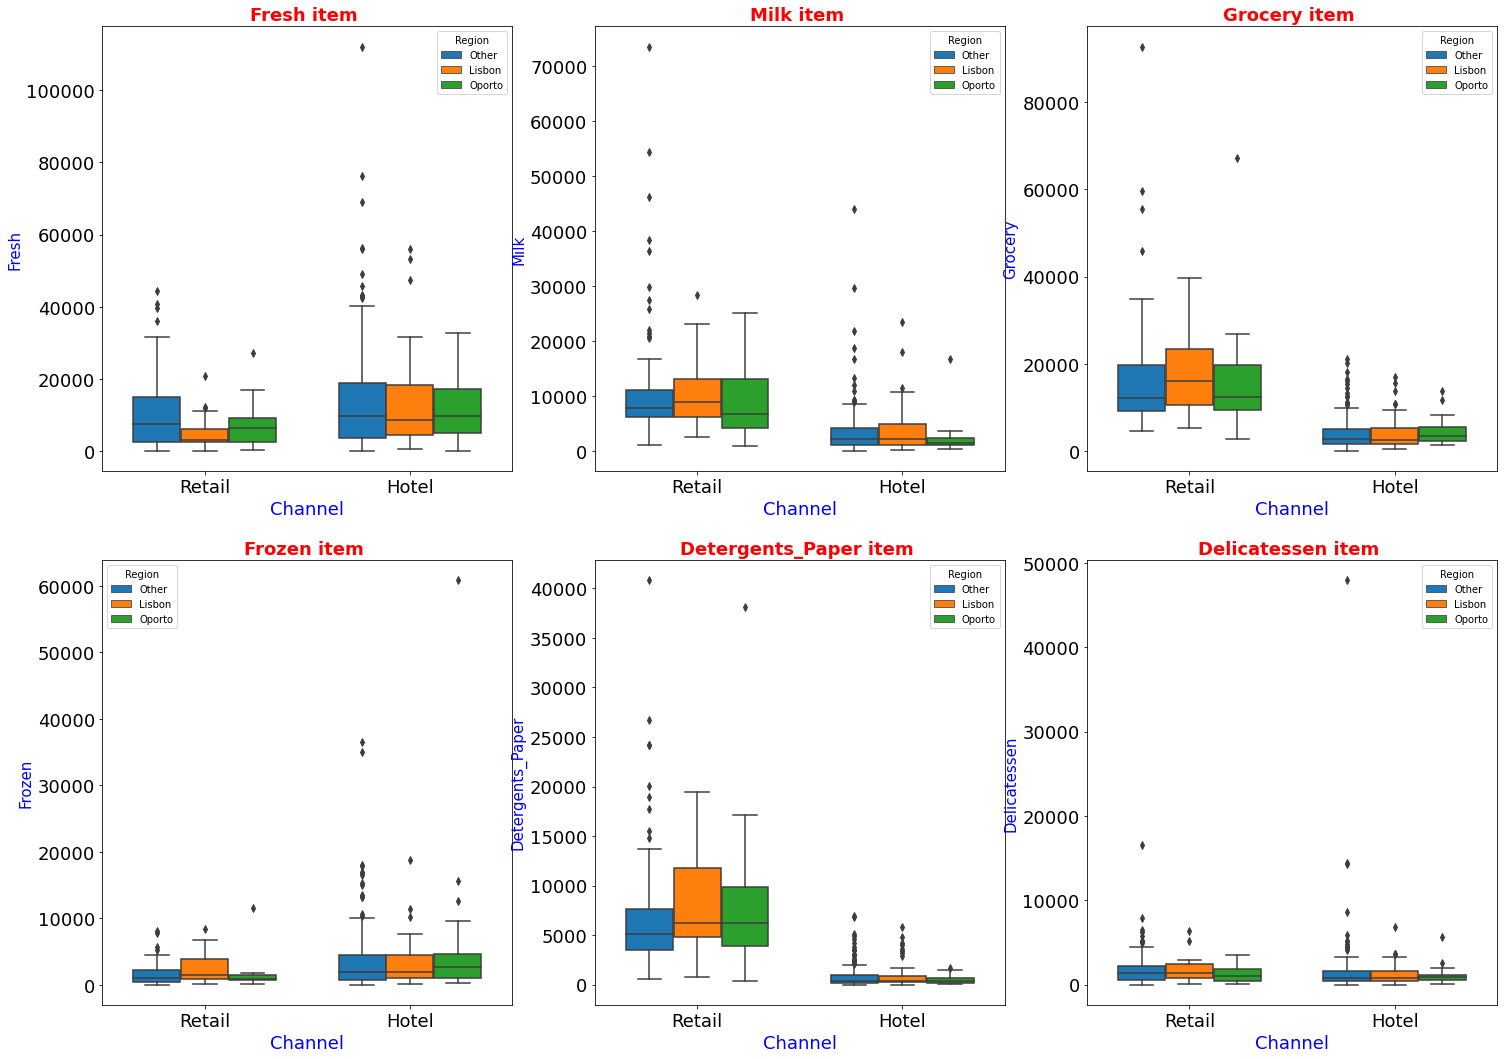

In [71]:
# Plotting the box plots of various items with respect to their spendings in different regions across both channels.

plt.figure(figsize=(25,18))
plt.subplot(2,3,1)
ax=sns.boxplot(y='Fresh', x='Channel', hue='Region', data=WSCustomerData, width=0.7, saturation=1)
ax.set_title("Fresh item ", fontsize =18, color ='Red', weight ="bold")
ax.set_xlabel("Channel", fontsize =18, color ='blue')
ax.set_ylabel("Fresh", fontsize =15, color ='blue')
ax.tick_params(labelsize =18)

plt.subplot(2,3,2)
bx=sns.boxplot(y='Milk', x='Channel', hue='Region', data=WSCustomerData, width=0.7,saturation=1)
bx.set_title("Milk item ", fontsize =18, color ='Red', weight ="bold")
bx.set_xlabel("Channel", fontsize =18, color ='blue')
bx.set_ylabel("Milk", fontsize =15, color ='blue')
bx.tick_params(labelsize =18)

plt.subplot(2,3,3)
cx=sns.boxplot(y='Grocery', x='Channel', hue='Region', data=WSCustomerData, width=0.7,saturation=1)
cx.set_title("Grocery item ", fontsize =18, color ='Red', weight ="bold")
cx.set_xlabel("Channel", fontsize =18, color ='blue')
cx.set_ylabel("Grocery", fontsize =15, color ='blue')
cx.tick_params(labelsize =18)

plt.subplot(2,3,4)
dx=sns.boxplot(y='Frozen', x='Channel', hue='Region', data=WSCustomerData, width=0.7, saturation=1)
dx.set_title("Frozen item ", fontsize =18, color ='Red', weight ="bold")
dx.set_xlabel("Channel", fontsize =18, color ='blue')
dx.set_ylabel("Frozen", fontsize =15, color ='blue')
dx.tick_params(labelsize =18)

plt.subplot(2,3,5)
ex=sns.boxplot(y='Detergents_Paper', x='Channel', hue='Region', data=WSCustomerData, width=0.7, saturation=1)
ex.set_title("Detergents_Paper item ", fontsize =18, color ='Red', weight ="bold")
ex.set_xlabel("Channel", fontsize =18, color ='blue')
ex.set_ylabel("Detergents_Paper", fontsize =15, color ='blue')
ex.tick_params(labelsize =18)


plt.subplot(2,3,6)
fx=sns.boxplot(y='Delicatessen', x='Channel', hue='Region', data=WSCustomerData, width=0.7,saturation=1)
fx.set_title("Delicatessen item ", fontsize =18, color ='Red', weight ="bold")
fx.set_xlabel("Channel", fontsize =18, color ='blue')
fx.set_ylabel("Delicatessen", fontsize =15, color ='blue')
fx.tick_params(labelsize =18)

plt.show()


#### We can see that the spending across retail and hotel channel is different for all the items except Delicatessen, where it seems quite similar in all regions and both channels

##### Fresh item
- Fresh item looks a little uniformly distributed in all regions in the hotel channel.But, shows variations in all regions in the retail channel
- there is much variation in spendings across other region in the hotel channel due to more outliers.
- it has the least spendings in Retail channel in Lisbon region

##### Milk item
- there is much variation in spendings across other region in the both hotel and retail channel due to more outliers.
- the spendings in hotel is lesser than that in retail channel as the plot is more compact in the hotel channel

##### Grocery
- Grocery items has less spendings in the hotel channel in all regions but shows uniform distribution in retail channel in lisbon region
- there is much variation in spendings across other region in the retail channel due to more outliers.

##### Frozen item
- the spendings are highly right skewed.
- it shows almost similar spendings in different regions in the hotel channel
- spendings on frozen item is very less in the oporto region

##### Detergents_Paper item
- spendings on Detergents_Paper item is very less in all regions in hotel channel
- there is much variation in spendings across other region in the retail channel due to more outliers.

##### Delicatessen item
- Frozen item and Delicatessen item shows similar kind of spendings across retail and hotel. Just the spread of annual spendings is greater in Frozen items.
- the spendings on Delicatessen items is least in all regions and channels as compared to all other items.

### Q 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

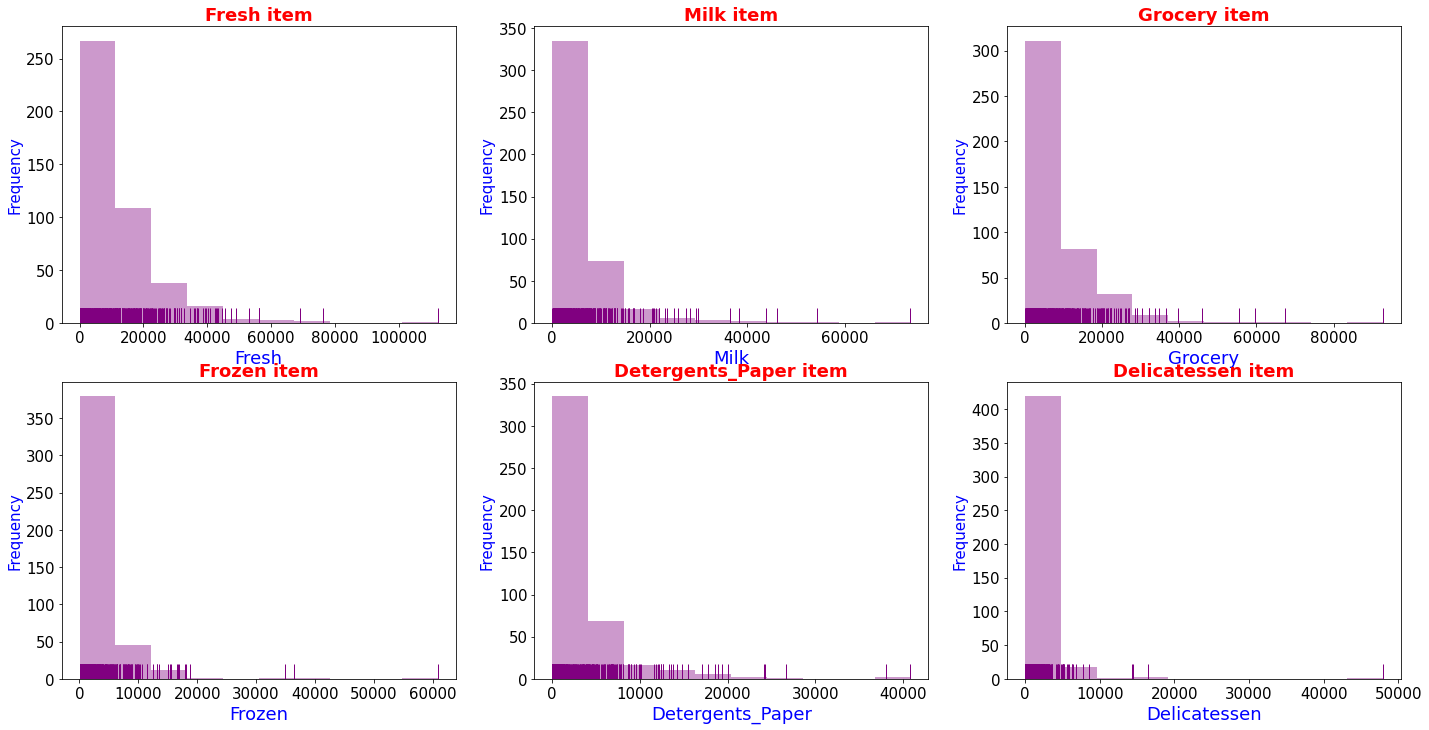

In [80]:
plt.figure(figsize= (24,12))
plt.subplot(2,3,1)
ax =sns.distplot(WSCustomerData['Fresh'], kde =False, rug =True, color ='purple', bins =10)
ax.set_title("Fresh item", fontsize =18, color ='Red', weight ="bold")
ax.set_xlabel("Fresh", fontsize =18, color ='blue')
ax.set_ylabel("Frequency", fontsize =15, color ='blue')
ax.tick_params(labelsize =15)

plt.subplot(2,3,2)
bx =sns.distplot(WSCustomerData['Milk'], kde =False, rug =True, color ='purple', bins =10)
bx.set_title("Milk item", fontsize =18, color ='Red', weight ="bold")
bx.set_xlabel("Milk", fontsize =18, color ='blue')
bx.set_ylabel("Frequency", fontsize =15, color ='blue')
bx.tick_params(labelsize =15)

plt.subplot(2,3,3)
cx =sns.distplot(WSCustomerData['Grocery'], kde =False, rug =True, color ='purple', bins =10)
cx.set_title("Grocery item", fontsize =18, color ='Red', weight ="bold")
cx.set_xlabel("Grocery", fontsize =18, color ='blue')
cx.set_ylabel("Frequency", fontsize =15, color ='blue')
cx.tick_params(labelsize =15)

plt.subplot(2,3,4)
dx =sns.distplot(WSCustomerData['Frozen'], kde =False, rug =True, color ='purple', bins =10)
dx.set_title("Frozen item", fontsize =18, color ='Red', weight ="bold")
dx.set_xlabel("Frozen", fontsize =18, color ='blue')
dx.set_ylabel("Frequency", fontsize =15, color ='blue')
dx.tick_params(labelsize =15)

plt.subplot(2,3,5)
ex =sns.distplot(WSCustomerData['Detergents_Paper'], kde =False, rug =True, color ='purple', bins =10)
ex.set_title("Detergents_Paper item", fontsize =18, color ='Red', weight ="bold")
ex.set_xlabel("Detergents_Paper", fontsize =18, color ='blue')
ex.set_ylabel("Frequency", fontsize =15, color ='blue')
ex.tick_params(labelsize =15)

plt.subplot(2,3,6)
fx =sns.distplot(WSCustomerData['Delicatessen'], kde =False, rug =True, color ='purple', bins =10)
fx.set_title("Delicatessen item", fontsize =18, color ='Red', weight ="bold")
fx.set_xlabel("Delicatessen", fontsize =18, color ='blue')
fx.set_ylabel("Frequency", fontsize =15, color ='blue')
fx.tick_params(labelsize =15)

plt.show()

### Calculating the Coefficient of Variation (CV)
##### CV = Standatd Deviation/mean

In [49]:
from scipy.stats import variation

cols = ['Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
for i in cols:
    print("The coefficient of variation for {} is {}".format(i, round(variation(WSCustomerData[i]),3)))

The coefficient of variation for Fresh is 1.053
The coefficient of variation for Milk is 1.272
The coefficient of variation for Grocery is 1.194
The coefficient of variation for Frozen is 1.579
The coefficient of variation for Detergents_Paper is 1.653
The coefficient of variation for Delicatessen is 1.847


- Delicatessen items shows the most inconsistent behaviour
- Fresh items show the least inconsistent behaviour.

### Q 1.4 Are there any outliers in the data?

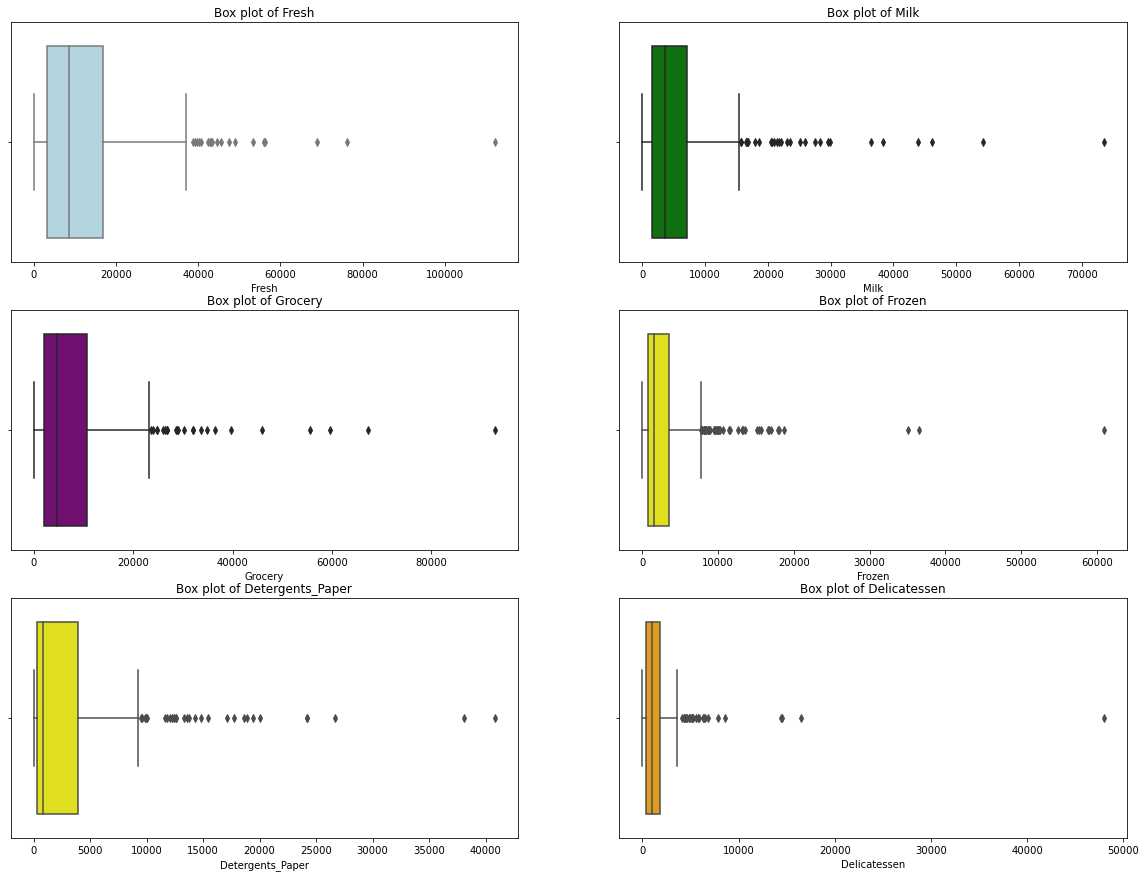

In [16]:
## Checking for Outliers4

plt.figure(figsize= (20,15))
plt.subplot(3,2,1)
sns.boxplot(x= 'Fresh',data =WSCustomerData ,color='lightblue', orient = 'h').set(title ="Box plot of Fresh")

plt.subplot(3,2,2)
sns.boxplot(x= 'Milk' ,data =WSCustomerData,color='green', orient='h').set(title ="Box plot of Milk")

plt.subplot(3,2,3)
sns.boxplot(x= 'Grocery' ,data =WSCustomerData,color='purple',orient='h').set(title ="Box plot of Grocery")

plt.subplot(3,2,4)
sns.boxplot(x= 'Frozen' ,data =WSCustomerData,color='yellow',orient='h').set(title ="Box plot of Frozen")

plt.subplot(3,2,5)
sns.boxplot(x= 'Detergents_Paper' ,data =WSCustomerData,color='yellow',orient='h').set(title ="Box plot of Detergents_Paper")

plt.subplot(3,2,6)
sns.boxplot(x= 'Delicatessen' ,data =WSCustomerData,color='orange', orient='h').set(title ="Box plot of Delicatessen");

- We can see that the data has outliers in all the items i.e. Fresh, Milk, Frozen, Grocery, Detergents_Paper and Delicatessen.
- Also, all of them are right skewed.

### Q 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

in Project report

##  Problem 2:

### The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [26]:
# Read the data as a data frame
Student= pd.read_csv("Survey-1.csv")

In [27]:
#checking the head of the data frame
Student.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


### Exploratory Data Analysis

In [28]:
#checking the data types /information
Student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


#### - The data has 62 instances with 14 attributes. 6 integer type, 2 float type and 6 object type(Strings in the column) 

In [29]:
## Checking the number of rows and columns
Student.shape

(62, 14)

In [30]:
#checking for missing values
Student.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [31]:
## Summary (also called as 5 Point summary)

Student.describe(include='all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


### Q 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)


### 2.1.1. Gender and Major


In [33]:
pd.crosstab(Student['Gender'], Student['Major'], margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [35]:
pd.crosstab(Student['Gender'], Student['Grad Intention'], margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


### 2.1.3. Gender and Employment

In [36]:
pd.crosstab(Student['Gender'], Student['Employment'], margins=True)


Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


### 2.1.4. Gender and Computer

In [37]:
pd.crosstab(Student['Gender'], Student['Computer'], margins=True)


Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


### Q 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:


### 2.2.1. What is the probability that a randomly selected CMSU student will be male?


In [68]:
#Lets create a crosstab of Gender and Employment of the students
cd = pd.crosstab(Student['Gender'], Student['Employment'], margins=True)
print(cd)

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Female              3         24           6   33
Male                7         19           3   29
All                10         43           9   62


In [46]:
Total_Students=62
Total_Males=29
Prob_CMSU_Male= round(Total_Males/Total_Students,4)*100
print('Probability  that a randomly selected CMSU student is a male. is %1.1f' % Prob_CMSU_Male +'%')

Probability  that a randomly selected CMSU student is a male. is 46.8%


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?


In [47]:
# Taking data from crosstab cd
Total_Students=62
Total_Females=33
Prob_CMSU_Female= round(Total_Females/Total_Students,4)*100
print('Probability  that a randomly selected CMSU student is a female. is %1.1f' % Prob_CMSU_Female +'%')


Probability  that a randomly selected CMSU student is a female. is 53.2%


### Q 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [38]:
pd.crosstab(Student['Gender'], Student['Major'], margins=True)


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [44]:
Total_Male_Students=29

#Pr(Male|Accounting)
Total_Males_Accounting=4
Prob_Male_Accounting= round(Total_Males_Accounting/Total_Male_Students,4)*100
print('Probability that a male student is from Accounting Major is %1.1f' % Prob_Male_Accounting +'%')

#Pr(Male|CIS)
Total_Males_CIS=1
Prob_Male_CIS= round(Total_Males_CIS/Total_Male_Students,4)*100
print('Probability that a male student is from CIS Major is %1.1f' % Prob_Male_CIS +'%')

#Pr(Male|Economics/Finance)
Total_Males_EcomFinance=4
Prob_Male_EcomFinance= round(Total_Males_EcomFinance/Total_Male_Students,4)*100
print('Probability that a male student is from Economics/Finance Major is %1.1f' % Prob_Male_EcomFinance +'%')

#Pr(Male|International Business)
Total_Males_IB=2
Prob_Male_IB= round(Total_Males_IB/Total_Male_Students,4)*100
print('Probability that a male student is from International Business Major is %1.1f' % Prob_Male_IB +'%')

#Pr(Male|Management)
Total_Males_Mgmt=6
Prob_Male_Mgmt= round(Total_Males_Mgmt/Total_Male_Students,4)*100
print('Probability that a male student is from Management Major is %1.1f' % Prob_Male_Mgmt +'%')

#Pr(Male|Other)
Total_Males_Other=4
Prob_Male_Other= round(Total_Males_Other/Total_Male_Students,4)*100
print('Probability that a male student is from Other Major is %1.1f' % Prob_Male_Other +'%')

#Pr(Male|Retailing/Marketing)
Total_Males_RM=5
Prob_Male_RM= round(Total_Males_RM/Total_Male_Students,4)*100
print('Probability that a male student is from Retailing/Marketing Major is %1.1f' % Prob_Male_RM +'%')

#Pr(Male|Undecided)
Total_Males_Un=3
Prob_Male_Un= round(Total_Males_Un/Total_Male_Students,4)*100
print('Probability that a male student is from Undecided Major is %1.1f' % Prob_Male_Un +'%')


Probability that a male student is from Accounting Major is 13.8%
Probability that a male student is from CIS Major is 3.5%
Probability that a male student is from Economics/Finance Major is 13.8%
Probability that a male student is from International Business Major is 6.9%
Probability that a male student is from Management Major is 20.7%
Probability that a male student is from Other Major is 13.8%
Probability that a male student is from Retailing/Marketing Major is 17.2%
Probability that a male student is from Undecided Major is 10.3%


### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [45]:
Total_Female_Students=33

#Pr(Female|Accounting)
Total_Female_Accounting=3
Prob_Female_Accounting= round(Total_Female_Accounting/Total_Female_Students,4)*100
print('Probability that a Female student is from Accounting Major is %1.1f' % Prob_Female_Accounting +'%')

#Pr(Female|CIS)
Total_Female_CIS=3
Prob_Female_CIS= round(Total_Female_CIS/Total_Female_Students,4)*100
print('Probability that a Female student is from CIS Major is %1.1f' % Prob_Female_CIS +'%')

#Pr(Female|Economics/Finance)
Total_Female_EcomFinance=7
Prob_Female_EcomFinance= round(Total_Female_EcomFinance/Total_Female_Students,4)*100
print('Probability that a Female student is from Economics/Finance Major is %1.1f' % Prob_Female_EcomFinance +'%')

#Pr(Female|International Business)
Total_Female_IB=4
Prob_Female_IB= round(Total_Female_IB/Total_Female_Students,4)*100
print('Probability that a Female student is from International Business Major is %1.1f' % Prob_Female_IB +'%')

#Pr(Female|Management)
Total_Female_Mgmt=4
Prob_Female_Mgmt= round(Total_Female_Mgmt/Total_Female_Students,4)*100
print('Probability that a Female student is from Management Major is %1.1f' % Prob_Female_Mgmt +'%')

#Pr(Female|Other)
Total_Female_Other=3
Prob_Female_Other= round(Total_Female_Other/Total_Female_Students,4)*100
print('Probability that a Female student is from Other Major is %1.1f' % Prob_Female_Other +'%')

#Pr(Female|Retailing/Marketing)
Total_Female_RM=9
Prob_Female_RM= round(Total_Female_RM/Total_Female_Students,4)*100
print('Probability that a Female student is from Retailing/Marketing Major is %1.1f' % Prob_Female_RM +'%')

#Pr(Female|Undecided)
Total_Female_Un=0
Prob_Female_Un= round(Total_Female_Un/Total_Female_Students,4)*100
print('Probability that a Female student is from Undecided Major is %1.1f' % Prob_Female_Un +'%')


Probability that a Female student is from Accounting Major is 9.1%
Probability that a Female student is from CIS Major is 9.1%
Probability that a Female student is from Economics/Finance Major is 21.2%
Probability that a Female student is from International Business Major is 12.1%
Probability that a Female student is from Management Major is 12.1%
Probability that a Female student is from Other Major is 9.1%
Probability that a Female student is from Retailing/Marketing Major is 27.3%
Probability that a Female student is from Undecided Major is 0.0%


### Q 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:


### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [73]:
cd2 = pd.crosstab(Student['Gender'], Student['Grad Intention'], margins=True)
print(cd2)

Grad Intention  No  Undecided  Yes  All
Gender                                 
Female           9         13   11   33
Male             3          9   17   29
All             12         22   28   62


In [48]:
#Pr(Male | Intends to Graduate)

Total_Students=62
Males_grad=17
Prob_Male_Intendto_graduate= round(Males_grad/Total_Students,4)*100
print('Probability  that a randomly selected CMSU student is a male and intends to graduate. is %1.1f' % Prob_Male_Intendto_graduate +'%')


Probability  that a randomly selected CMSU student is a male and intends to graduate. is 27.4%


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [75]:
cd4 = pd.crosstab(Student['Gender'], Student['Computer'], margins=True)
print(cd4)

Computer  Desktop  Laptop  Tablet  All
Gender                                
Female          2      29       2   33
Male            3      26       0   29
All             5      55       2   62


In [49]:
#Pr(Female | Doesnot have a laptop)

Total_Students=62
Female_nolaptop=2 + 2
Prob_Female_No_laptop= round(Female_nolaptop/Total_Students,4)*100
print('Probability  that a randomly selected CMSU student is a female and does not have a laptop. is %1.1f' % Prob_Female_No_laptop +'%')


Probability  that a randomly selected CMSU student is a female and does not have a laptop. is 6.5%


### Q 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:


### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [81]:
#Lets create a crosstab of Gender and Employment of the students
cd = pd.crosstab(Student['Gender'], Student['Employment'], margins=True)
print(cd)

Employment  Full-Time  Part-Time  Unemployed  All
Gender                                           
Female              3         24           6   33
Male                7         19           3   29
All                10         43           9   62


In [52]:
P_MaleFT= 7/Total_Students # Males who are full-time employed

P_Fulltime=10/Total_Students
P_Fulltime

#Pr(Male or has Full-time employment)

Total_Students=62
Male_Fulltime=7
Total_Males=29
Fulltime=10

#P(Male or Fulltime)=P(Males)+ P(Fulltime)-P(Males who are fulltime)

Prob_MaleORFulltime= round(((Total_Males + Fulltime) - Male_Fulltime)/Total_Students,4)*100
print('Probability  that a randomly selected CMSU student is either a male or has full-time employment. is %1.1f' % Prob_MaleORFulltime +'%')


Probability  that a randomly selected CMSU student is either a male or has full-time employment. is 51.6%


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [56]:
#Pr(Female|International Business)
Total_Female_IB=4
Prob_Female_IB= round(Total_Female_IB/Total_Female_Students,4)*100

#Pr(Female|Management)
Total_Female_Mgmt=4
Prob_Female_Mgmt= round(Total_Female_Mgmt/Total_Female_Students,4)*100

#Majoring in International Business and Management are both independent events

#Probability a random female student is majoring in international business or management= (Probability of females majoring in IB + Probability of females majoring in Management) 
P_IB_or_Mgmt= Prob_Female_IB + Prob_Female_Mgmt

print('Probability  that a randomly selected CMSU female student is majoring either in International Business or Management is %1.1f' % P_IB_or_Mgmt +'%')


Probability  that a randomly selected CMSU female student is majoring either in International Business or Management is 24.2%


### Q 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?


In [55]:
Student_not_Undecided = Student[Student['Grad Intention']!='Undecided']

cdx=pd.crosstab(Student['Gender'],Student_not_Undecided['Grad Intention'])
print(cdx)

Grad Intention  No  Yes
Gender                 
Female           9   11
Male             3   17


In [61]:
Total_Students=62

#P(Grad Intention)
Students_Grad_Intention=28

Prob_Students_GradIntent= round(Students_Grad_Intention/Total_Students,4)*100
print('Probability that a randomly selected CMSU student has an intent to graduate is %1.1f' % Prob_Students_GradIntent +'%')


#P(Grad Intention|Female)
Female_Grad_Intention=11

Prob_Female_GradIntent= round(Female_Grad_Intention/Total_Students,4)*100
print('Probability that a randomly selected female student has an intent to graduate is %1.1f' % Prob_Female_GradIntent +'%')

#As both the probabilities have a huge difference, being a female and graduate intention are dependent events.

Probability that a randomly selected CMSU student has an intent to graduate is 45.2%
Probability that a randomly selected female student has an intent to graduate is 17.7%


### Q 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

### Answer the following questions based on the data


### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?


In [65]:
Student_GPAlessthan3 = Student[Student['GPA']< 3]
Student_GPAlessthan3['GPA'].count()

17

In [67]:
Total_Students_GPAlessthan3 = 17
Total_Students= 62

Prob_Students_GPAlessthan3= round(Total_Students_GPAlessthan3/Total_Students,4)*100
print('Probability that a randomly selected student has a GPA less than 3 is %1.1f' % Prob_Students_GPAlessthan3 +'%')



Probability that a randomly selected student has a GPA less than 3 is 27.4%


### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [75]:
Student_Male_earnsmorethan50 = Student[Student['Salary']>=50].groupby('Gender')
Student_Male_earnsmorethan50['Gender'].count()

Gender
Female    18
Male      14
Name: Gender, dtype: int64

In [77]:
Males_earnsmorethan50 = 14
Females_earnsmorethan50=18

Total_Students= 62

Prob_Males_earnsmorethan50= round(Males_earnsmorethan50/Total_Students,4)*100
print('Probability that a randomly selected student male earns more than 50 is %1.1f' % Prob_Males_earnsmorethan50 +'%')


Prob_Females_earnsmorethan50= round(Females_earnsmorethan50/Total_Students,4)*100
print('Probability that a randomly selected student female earns more than 50 is %1.1f' % Prob_Females_earnsmorethan50 +'%')


Probability that a randomly selected student male earns more than 50 is 22.6%
Probability that a randomly selected student female earns more than 50 is 29.0%


### Q 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

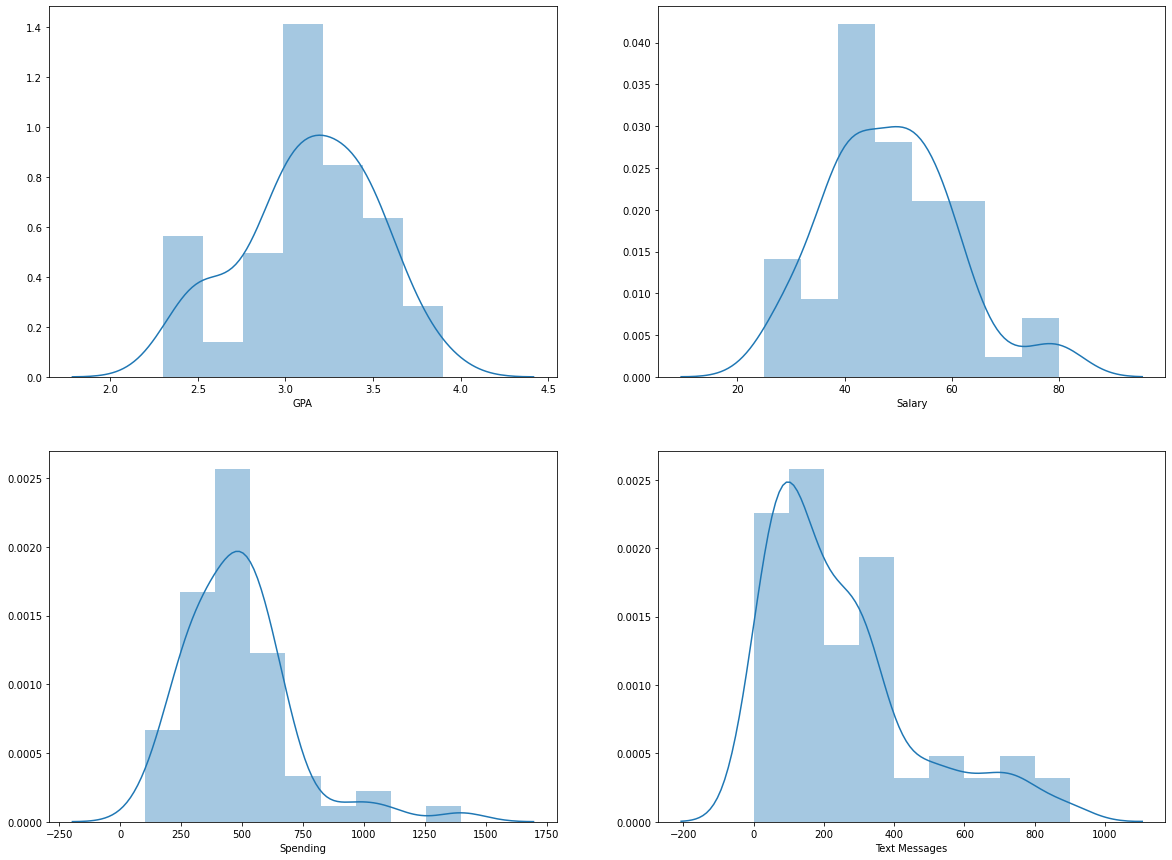

In [111]:
## Checking if GPA, Salary, Spending and Text Messages follows a normal distribution and is continuous 
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
sns.distplot(Student['GPA'])

plt.subplot(2,2,2)
sns.distplot(Student['Salary'])

plt.subplot(2,2,3)
sns.distplot(Student['Spending'])

plt.subplot(2,2,4)
sns.distplot(Student['Text Messages']);

In [100]:
from scipy.stats import shapiro   # Sharipo-Wilk Test

In [104]:
## Normality test for GPA

stat,p = shapiro(Student['GPA'])
print("Statistics = %.3f, p-value = %.3f"%(stat,p))

alpha = 0.05
if p>alpha:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

Statistics = 0.969, p-value = 0.112
We fail to reject the null hypothesis


In [105]:
## Normality test for Salary

stat,p = shapiro(Student['Salary'])
print("Statistics = %.3f, p-value = %.3f"%(stat,p))

alpha = 0.05
if p>alpha:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

Statistics = 0.957, p-value = 0.028
We reject the null hypothesis


In [106]:
## Normality test for Spending

stat,p = shapiro(Student['Spending'])
print("Statistics = %.3f, p-value = %.3f"%(stat,p))

alpha = 0.05
if p>alpha:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

Statistics = 0.878, p-value = 0.000
We reject the null hypothesis


In [108]:
## Normality test for Text Messages

stat,p = shapiro(Student['Text Messages'])
print("Statistics = %.3f, p-value = %.3f"%(stat,p))

alpha = 0.05
if p>alpha:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

Statistics = 0.859, p-value = 0.000
We reject the null hypothesis


In [113]:
def empirical(x):
    sd = x.std()
    mean = x.mean()
    
    print ("68% of the data should lie between {} and {}".format(mean-sd, mean+sd))
    print("{}% data lies LL and UL for 68%". format(pd.Series((x >mean-sd) & (x<mean+sd)).value_counts(normalize=True).values[0]*100),'\n')
    
    print ("95% of the data should lie between {} and {}".format(mean-(2*sd), mean+(2*sd)))
    print("{}% data lies LL and UL for 95%". format(pd.Series((x >mean-(2*sd)) & (x<mean+(2*sd))).value_counts(normalize=True).values[0]*100),'\n')
    
    print ("99% of the data should lie between {} and {}".format(mean-(3*sd), mean+(3*sd)))
    print("{}% data lies LL and UL for 99%". format(pd.Series((x >mean-(3*sd)) & (x<mean+(3*sd))).value_counts(normalize=True).values[0]*100),'\n')
    

In [114]:
empirical(Student['GPA'])

68% of the data should lie between 2.7516438653676043 and 3.5064206507614277
72.58064516129032% data lies LL and UL for 68% 

95% of the data should lie between 2.3742554726706926 and 3.8838090434583394
96.7741935483871% data lies LL and UL for 95% 

99% of the data should lie between 1.9968670799737804 and 4.261197436155252
100.0% data lies LL and UL for 99% 



In [115]:
empirical(Student['Salary'])

68% of the data should lie between 36.46747488043692 and 60.62929931311147
79.03225806451613% data lies LL and UL for 68% 

95% of the data should lie between 24.38656266409964 and 72.71021152944874
95.16129032258065% data lies LL and UL for 95% 

99% of the data should lie between 12.30565044776236 and 84.79112374578602
100.0% data lies LL and UL for 99% 



In [116]:
empirical(Student['Spending'])

68% of the data should lie between 260.062324066296 and 703.9699339982201
80.64516129032258% data lies LL and UL for 68% 

95% of the data should lie between 38.10851910033398 and 925.9237389641821
95.16129032258065% data lies LL and UL for 95% 

99% of the data should lie between -183.84528586562806 and 1147.8775439301442
98.38709677419355% data lies LL and UL for 99% 



In [117]:
empirical(Student['Text Messages'])

68% of the data should lie between 31.74372711665876 and 460.67562772205093
79.03225806451613% data lies LL and UL for 68% 

95% of the data should lie between -182.72222318603733 and 675.141578024747
91.93548387096774% data lies LL and UL for 95% 

99% of the data should lie between -397.18817348873336 and 889.6075283274431
98.38709677419355% data lies LL and UL for 99% 



### Q 2.8.2 Write a note summarizing your conclusions.

In project report

##  Problem 3:

### An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

### The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [81]:
from scipy.stats import ttest_1samp, ttest_ind

In [82]:
## Reading the data as a data frame
Shingles = pd.read_csv("A & B shingles-1.csv")

In [83]:
##checking the head of the data frame
Shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [84]:
### Summary (also called as 5 Point summary)
Shingles.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


### Q 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [85]:
#There is enough evidence to prove that means moisture contents in both types of shingles are within the permissible limits

## Step 1 -  Get the details
## n=31
## alpha = 0.05
##Step 2 -  State the hypothesis

## a)t_stat, p_value = stats.ttest_1samp(Shingles.A.dropna(),0.35)
## Print the statistics and p-value
## Print if if you accept or reject the null hypothesis

## b) t_stat, p_value = stats.ttest_1samp(Shingles.B.dropna(),0.35) -  Why drop na, because there are different observations
## Print the statistics and p-value
## Print if if you accept or reject the null hypothesis

## Check the p-value(if Positive) , ensure you subtract from 1, that is , 1-p_value/2

In [86]:
n=31
alpha=0.05

#HO= mu <= 0.35
#HA= mu > 0.35

t_stat, p_value = stats.ttest_1samp(Shingles.A.dropna(),0.35)
t_stat, p_value

(-1.4735046253382782, 0.14955266289815025)

In [87]:
if (1-p_value)/2>alpha:
    print(" We fail to reject the null hypothesis")
else:
    print(" We reject the null hypothesis")

 We fail to reject the null hypothesis


In [88]:
t_stat, p_value = stats.ttest_1samp(Shingles.B.dropna(),0.35)
t_stat, p_value

(-3.1003313069986995, 0.004180954800638363)

In [89]:
if (1-p_value)/2>alpha:
    print(" We fail to reject the null hypothesis")
else:
    print(" We reject the null hypothesis")

 We fail to reject the null hypothesis


### Q 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [129]:
## Assumptions for T-Test
## 1. The scale of measurement applied to the data follows a continuous or ordinal scale
## 2. The data is collected from a randomly selected portion of the total population
## 3. The data collected follows a normal distribution
## 4. Sample size should be large

In [131]:
## Step 1 - Mention the hypothesis
## Step 2 -  What is the alpha value
##Step 3 Mention what test will you perform

## In the Shingles Case
##H0: Mu Shingles A = Mu Shingles B ( Null hypothesis -  Mean Moisture in both Shingles A and B are equal)
##H1  Mu Shingles A ≠  Mu Shingles B( Alternative hypothesis -  Mean Moisture in both Shingles A and B are different)

## Step 4 Performing the Two sample test

t_statistic,p_value = ttest_ind(Shingles['A'],Shingles['B'], axis=0,equal_var=True,nan_policy='omit')

print("Two sample t test  \nt  statistic :{} p-value:{}" .format(t_statistic,p_value),'\n' )

alpha  =0.05

print('Level of significance:%.2f' % alpha, '\n')
print('Our two-sample t -test p-value:%.2f' % p_value, '\n')

## Step 5:

if p_value>alpha:
    print(" We fail to reject the null hypothesis")
else:
    print(" We reject the null hypothesis")

Two sample t test  
t  statistic :1.2896282719661123 p-value:0.2017496571835306 

Level of significance:0.05 

Our two-sample t -test p-value:0.20 

 We fail to reject the null hypothesis


- Therefore, population mean for shingles A and B are equal.